Preprocessing Phase of Capstone 2
Project: Cluster Analysis of Tech Companies by Education Attainment

Action Steps: 

Data Cleaning: We saw in the EDA phase that decimal places in our Education Data for several years (2011-20014) needs to be restored. There are also several missing values and some of our columns are redundant and can confuse our analysis. We will handle missing values, inconsistent data, and duplicates.

Feature Engineering:
We sill selected relevant features related to education and business data seperately and then remerge education and business datasets.

Data Scaling:
We will standardized features to ensure they have a mean of 0 and a standard deviation of 1.

Correlation Analysis:
We will analyze the correlation matrix to identify multicollinearity among features.

Data Visualization:
We will visualize feature distributions and the explained variance by PCA components.

Dimensionality Reduction:
We will perform PCA (Principal Component Analysis) to reduce the dimensionality of the data while retaining most of the variance.

In [20]:
import pandas as pd

# Load the data with specified dtype for ZipCode and NAICS columns
file_path = '/Users/admin/Desktop/final_filtered_business_education_data.csv'
data = pd.read_csv(file_path, dtype={'ZipCode': str, 'NAICS': str})

# Define the columns of interest
columns_of_interest = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Filter data to only keep the necessary columns
education_columns = columns_of_interest + ['ZipCode', 'Year']
business_columns = [
    'BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
    'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION'
]
data = data[business_columns + education_columns]

# Correct the decimal point for the specified years and columns by multiplying by 100
years_to_correct = [2011, 2012, 2013, 2014]
for year in years_to_correct:
    mask = data['Year'] == year
    data.loc[mask, columns_of_interest] *= 100

# Ensure no duplicate columns and consistent column types
data = data.loc[:, ~data.columns.duplicated()]

# Save the final data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data.to_csv(final_file_path, index=False)

# Display summary statistics to confirm changes
summary = data.groupby('Year').sum(numeric_only=True)
print(summary)

# Output the first few rows of the final merged data
print(data.head())


      LOCATION END DATE  Pop 18-24 Some College  Pop 18-24 Bachelors+  \
Year                                                                    
2011                0.0               2236990.0             1056360.0   
2012                0.0               2341890.0             1121860.0   
2013                0.0               2721120.0             1270790.0   
2014                0.0               3500570.0             1749460.0   
2015                0.0               1580556.0              617906.0   
2016                0.0               1671432.0              602824.0   
2017                0.0               1554794.0              580437.0   
2018                0.0               1879730.0              644453.0   
2019                0.0               1544163.0              567454.0   
2020                0.0               1088170.0              427783.0   
2021                0.0                980632.0              371778.0   
2022                0.0                851374.0    

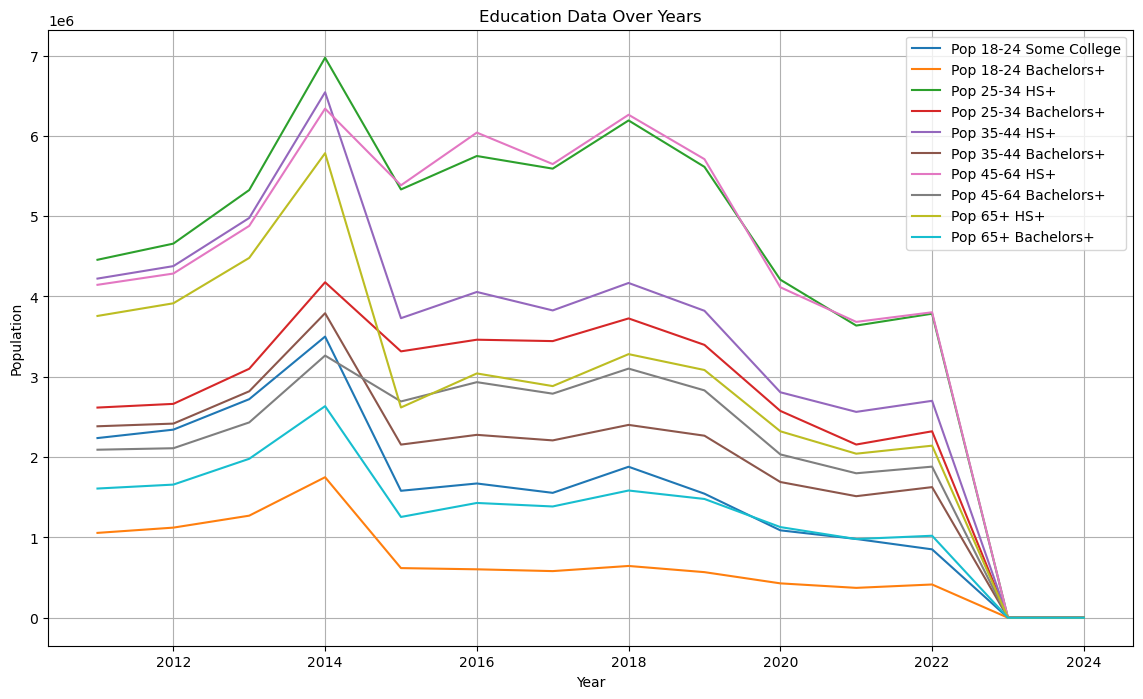

In [21]:
import matplotlib.pyplot as plt

# List of columns to plot (education-related columns)
columns_to_plot = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Ensure you're using the correct dataset (replace 'merged_data' if necessary)
# Group data by Year and sum the columns to be plotted
grouped_data = data.groupby('Year')[columns_to_plot].sum()

# Plotting the education data over the years
plt.figure(figsize=(14, 8))

for column in columns_to_plot:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Education Data Over Years')
plt.legend()
plt.grid(True)
plt.show()

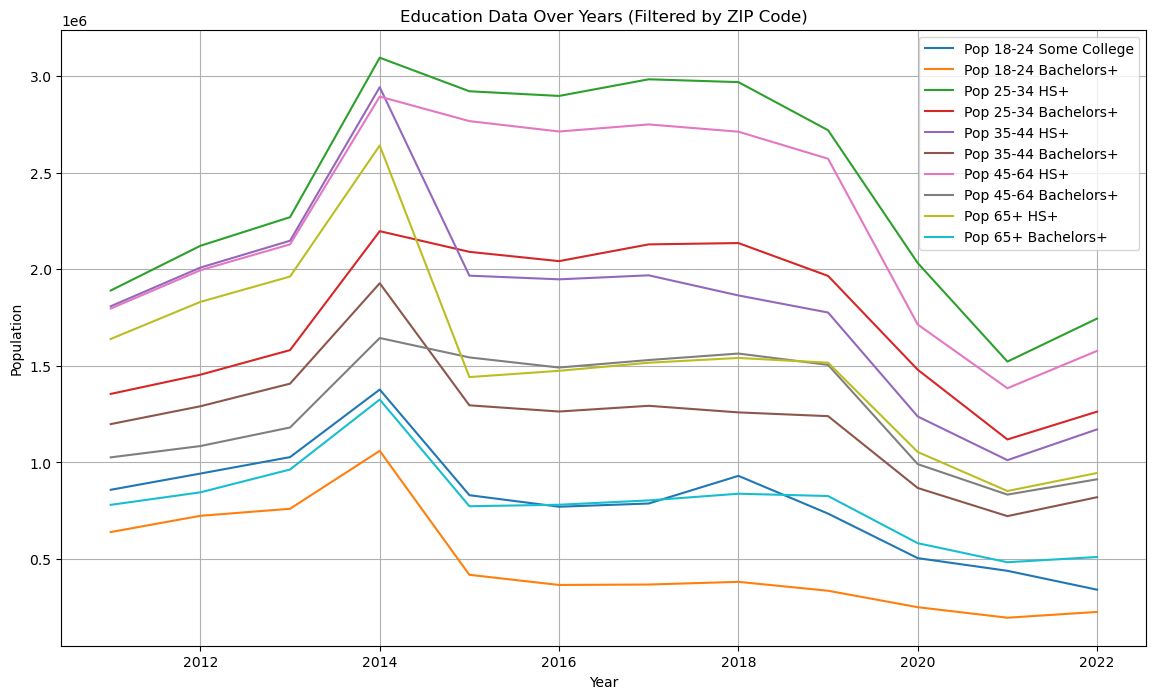

In [40]:
import numpy as np

# Ensure 'ZipCode' is a string for processing
data['ZipCode'] = data['ZipCode'].astype(str)

# Remove non-numeric characters in 'ZipCode' (split at hyphens and other invalid parts)
data['ZipCode'] = data['ZipCode'].str.split('-').str[0]

# Filter to keep only rows where 'ZipCode' is numeric
data['ZipCode'] = data['ZipCode'].apply(lambda x: x if x.isdigit() else np.nan)

# Drop rows with non-numeric ZIP codes
data = data.dropna(subset=['ZipCode'])

# Now safely convert 'ZipCode' to integers
data['ZipCode'] = data['ZipCode'].astype(int)

# List of relevant ZIP codes for filtering
zip_codes_of_interest = [
    90401, 90402, 90403, 90404, 90405,  # Santa Monica
    90291, 90292,                      # Venice
    90038, 90046, 90048, 90069,        # West Hollywood
    90230, 90232,                      # Culver City
    90016, 90019,                      # Mid-City
    90012, 90013, 90014, 90015, 90017, 90021,  # Downtown LA
    90024, 90025, 90034, 90035, 90049, 90064, 90066, 90067  # LA Westside
]

# Filter the data for relevant ZIP codes
filtered_data = data[data['ZipCode'].isin(zip_codes_of_interest)]

# Remove the years 2023 and 2024
filtered_data = filtered_data[~filtered_data['Year'].isin([2023, 2024])]

# Save to a CSV file
filtered_data.to_csv('filtered_data.csv', index=False)

# Group data by Year and sum the columns to be plotted
grouped_data = filtered_data.groupby('Year')[columns_to_plot].sum()

# Plotting the filtered education data over the years
plt.figure(figsize=(14, 8))

for column in columns_to_plot:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Education Data Over Years (Filtered by ZIP Code)')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

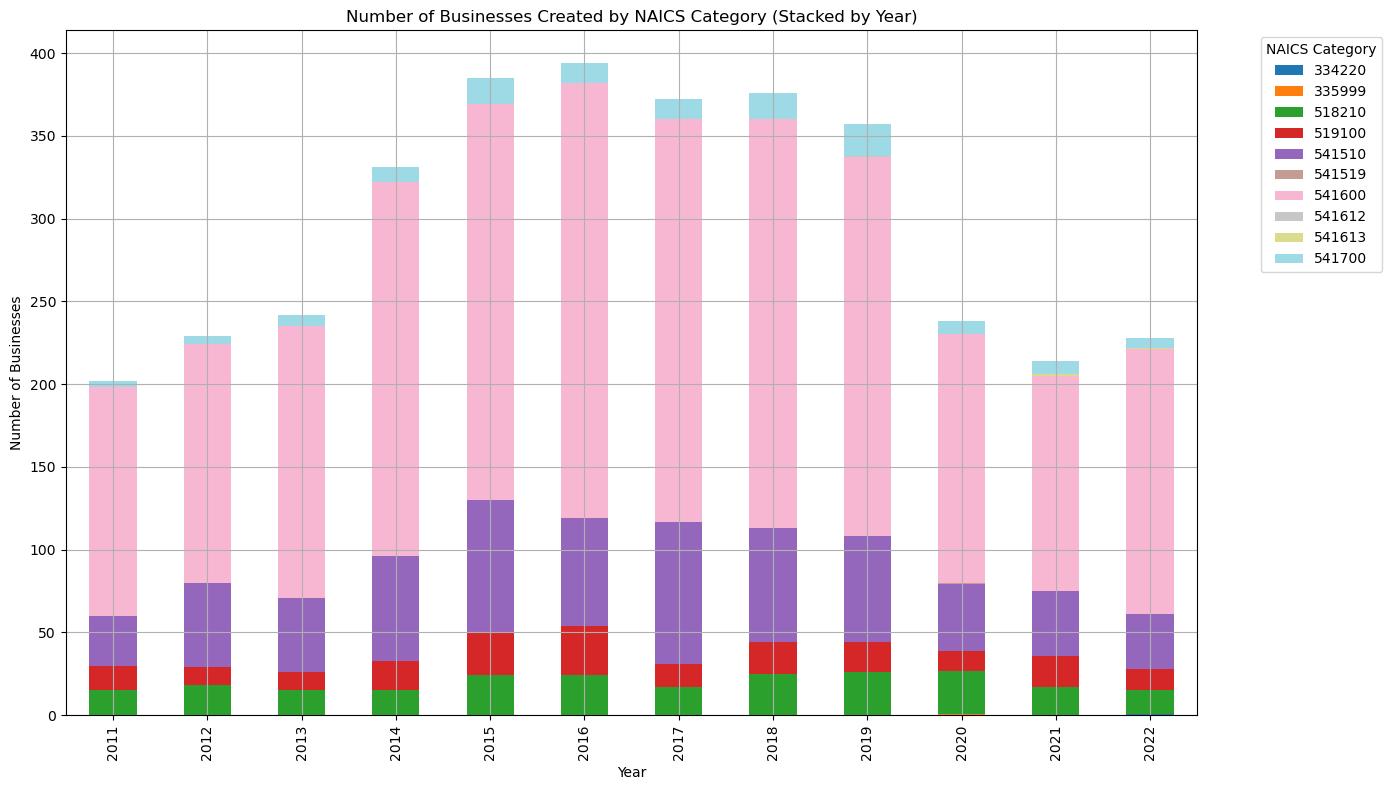

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data' contains your relevant data with NAICS codes and Year

# Group data by Year and NAICS to count businesses created each year for each NAICS category
business_data_grouped = filtered_data.groupby(['Year', 'NAICS']).size().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart
business_data_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title('Number of Businesses Created by NAICS Category (Stacked by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.legend(title='NAICS Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


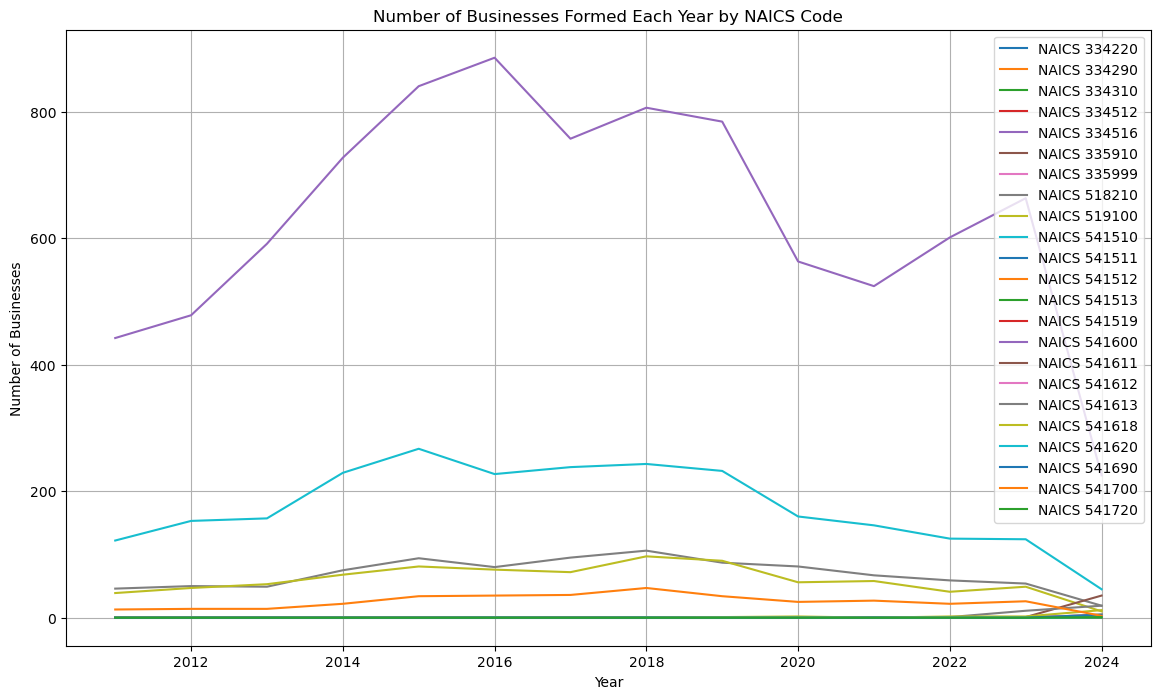

In [34]:
# Count the number of businesses formed each year for each NAICS code
naics_counts = data.groupby(['Year', 'NAICS']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

for naics_code in naics_counts.columns:
    plt.plot(naics_counts.index, naics_counts[naics_code], label=f'NAICS {naics_code}')

plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses Formed Each Year by NAICS Code')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

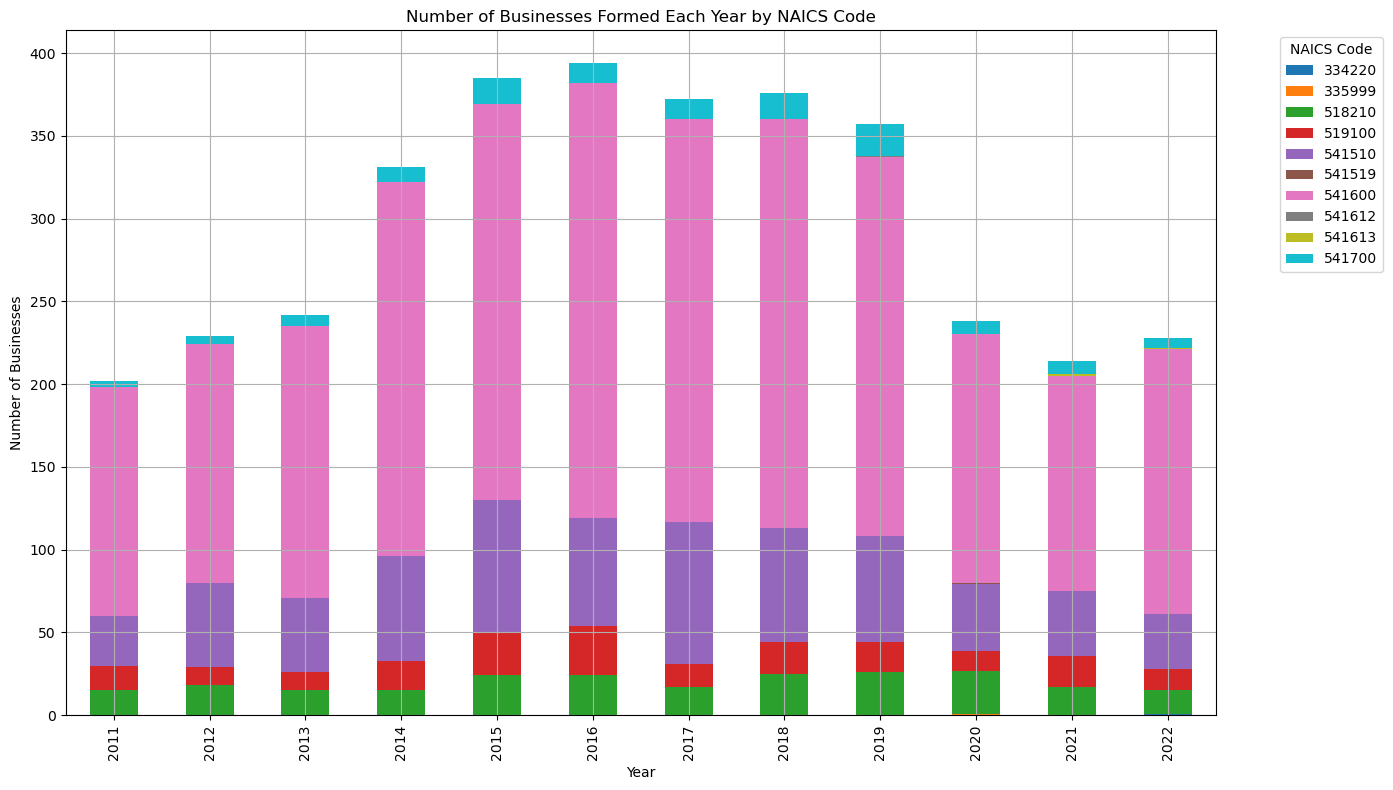

In [29]:
# Count the number of businesses formed each year for each NAICS code
naics_counts = filtered_data.groupby(['Year', 'NAICS']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

naics_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Year')
plt.ylabel('Number of Businesses')
plt.title('Number of Businesses Formed Each Year by NAICS Code')
plt.legend(title='NAICS Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

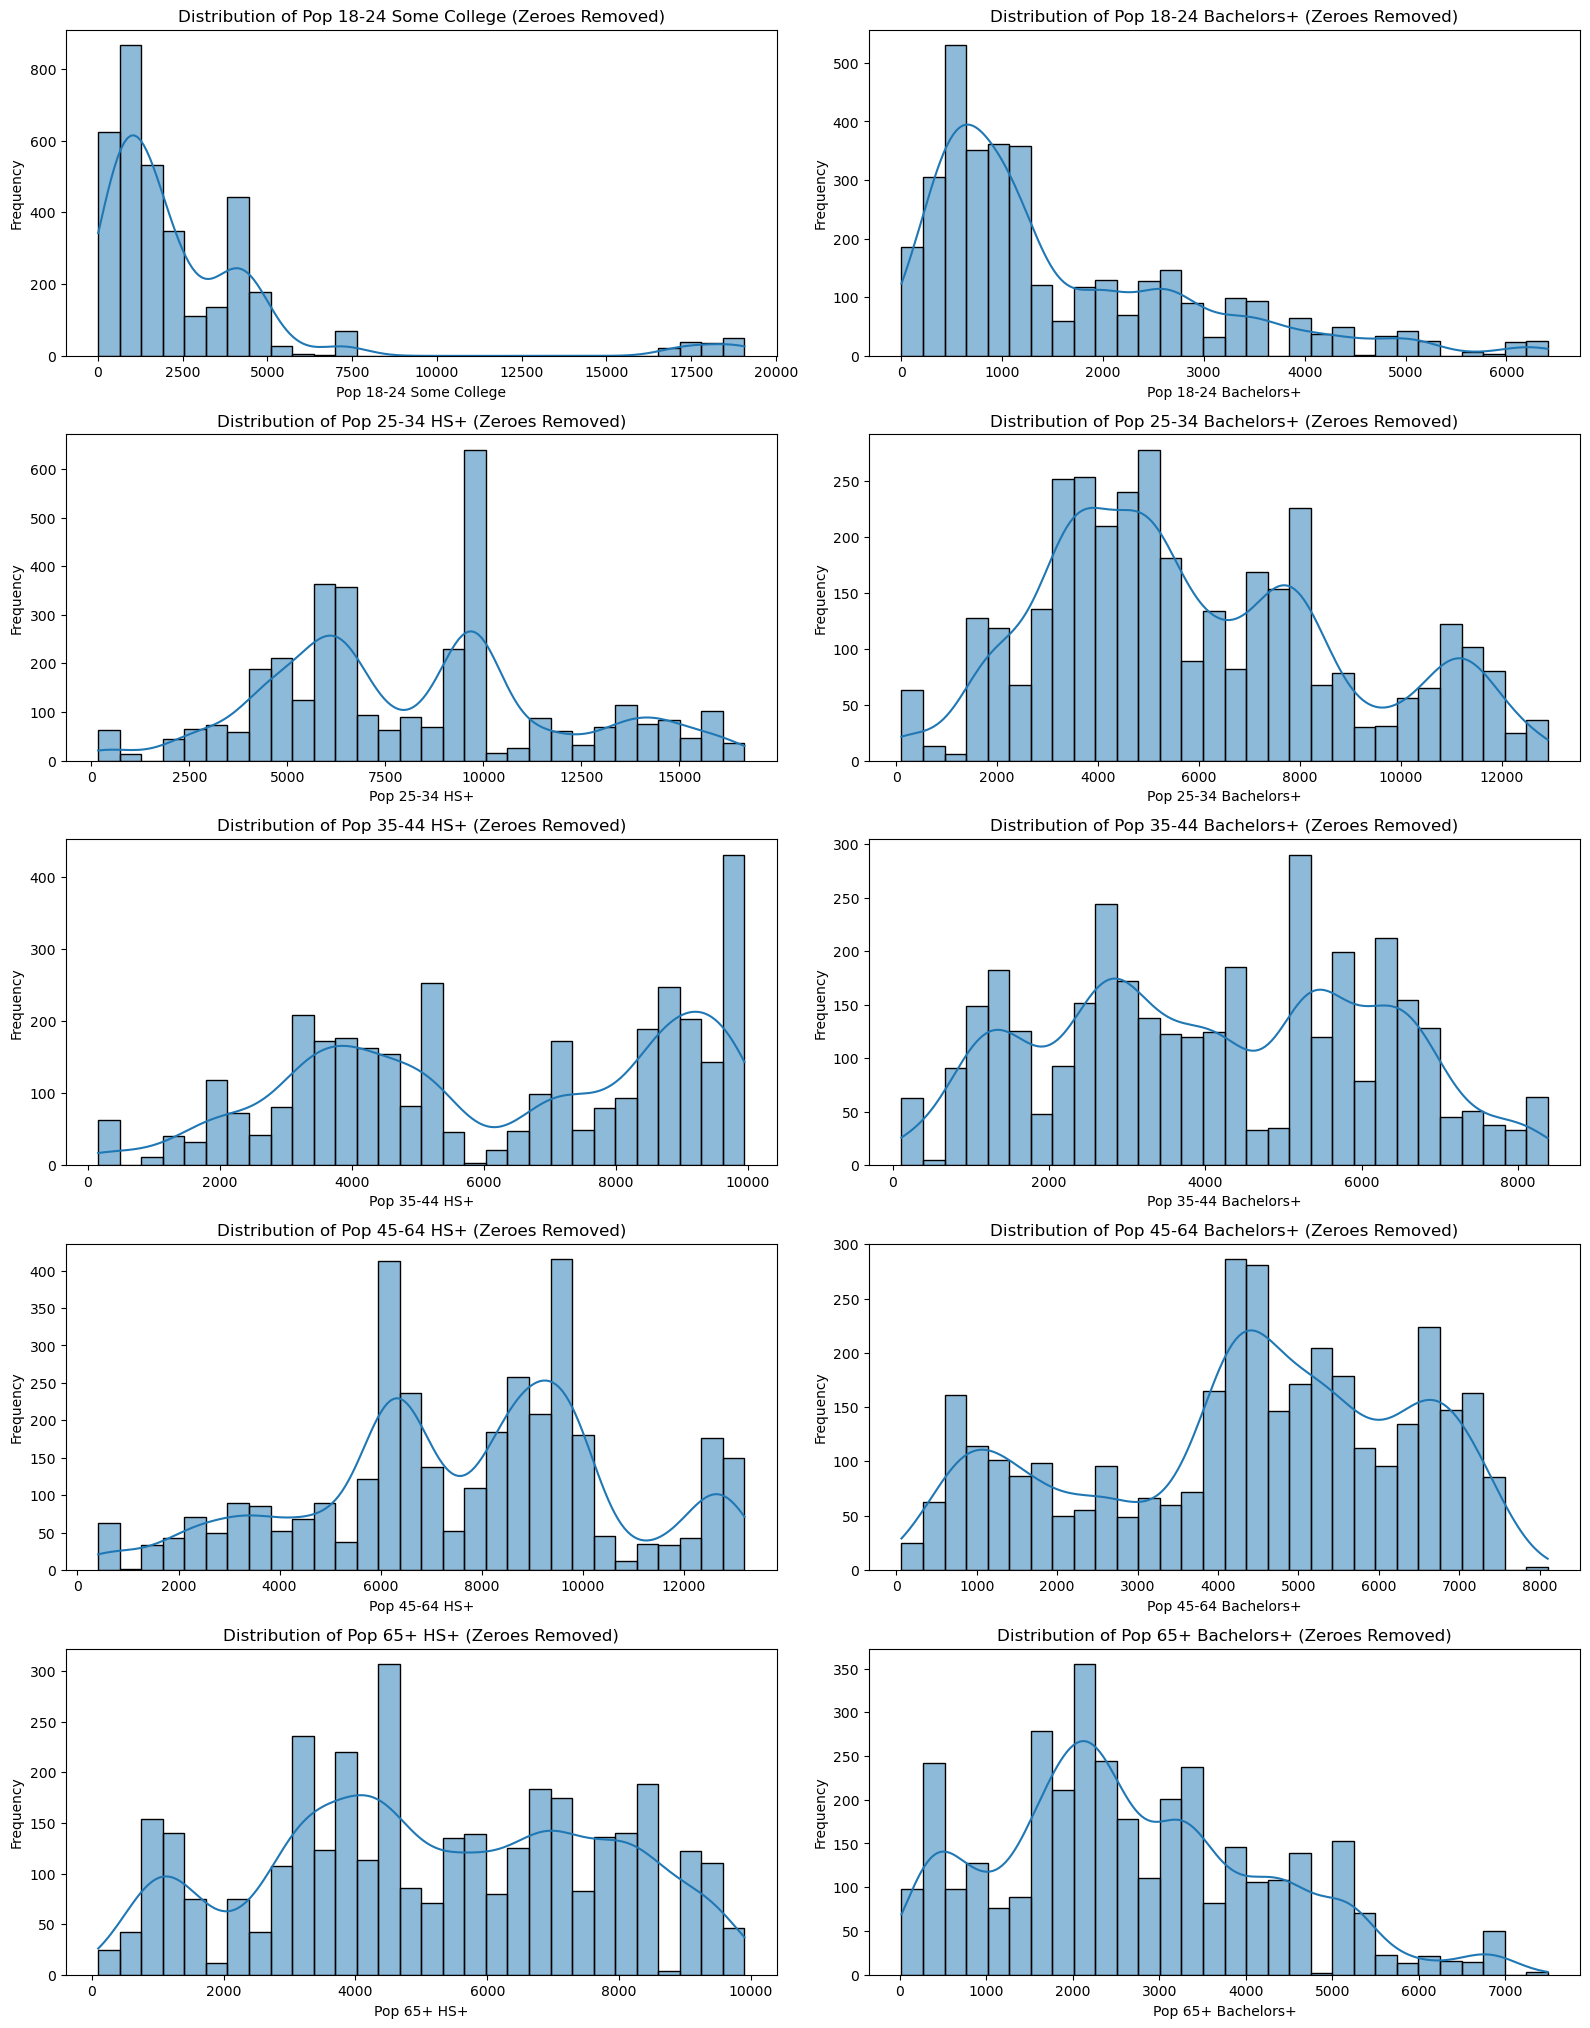

In [45]:
# Define the feature columns (replace these with your actual columns)
feature_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Replace any infinity values with NaN
filtered_data_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with zero values in any of the feature columns
filtered_data_final = filtered_data[(filtered_data[feature_columns] != 0).all(axis=1)]

# Save the final data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data.to_csv(final_file_path, index=False)


# Plotting histograms for filtered data
plt.figure(figsize=(16, 24))

# Loop through each column to create a histogram
for i, column in enumerate(feature_columns, 1):
    plt.subplot(len(feature_columns) // 2 + 1, 2, i)
    sns.histplot(filtered_data_final[column], bins=30, kde=True)
    plt.title(f'Distribution of {column} (Zeroes Removed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interpretation
Zero Values Removed: The histograms now exclude zero values, providing a clearer view of the non-zero data points. This can help in understanding the actual distribution of the population that has attained different education levels.

Skewness: Many of the distributions are right-skewed (positive skew), meaning that most data points are clustered at the lower end with a long tail extending to the right. This is common in many datasets where a few individuals or areas have significantly higher values than the rest.

Peaks: Some histograms show distinct peaks, indicating common values or ranges in the dataset. For example, the "Pop 25-34 HS+" category has a noticeable peak around the 10,000 mark.

Outliers: The presence of outliers can be observed, especially in categories where a few records have exceptionally high values compared to the rest.

In [48]:
print(filtered_data_final.head(10))

            BUSINESS NAME    ZIP CODE   NAICS LOCATION START DATE  \
83         SUSAN K TENNER  90034-6505  541600          01/01/2019   
84   ROBERT D KAMINSKI JR  90034-3001  541600          01/01/2019   
85           ANDREW LEVEY  90034-1816  541600          11/30/2019   
86          JOHANNES SAAM  90034-1612  541510          01/01/2019   
87           MELISSA SATO  90034-6108  541700          01/01/2019   
88         DREW P JOHNSON  90034-6219  541510          01/15/2019   
89             ANN W. CHU  90034-5343  541600          02/28/2019   
90  BARTLETT TREE EXPERTS  90034-0034  541600          04/01/2019   
91          MARY A BOURKE  90034-7139  541600          05/18/2019   
92            SIMONE SAAM  90034-1612  541510          01/01/2019   

    LOCATION END DATE              LOCATION  \
83                NaN  (34.0189, -118.4195)   
84                NaN  (34.0252, -118.4194)   
85                NaN  (34.0392, -118.3954)   
86                NaN  (34.0404, -118.3733)   
87   

In [51]:
# List of education-related columns
education_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Convert the education columns to integers using .loc to avoid SettingWithCopyWarning
filtered_data_final.loc[:, education_columns] = filtered_data_final[education_columns].astype(int)

# Check the result
print("After conversion to integers:\n", filtered_data_final[education_columns].head(10))

# Save the cleaned dataset (without scaling)
filtered_data_final.to_csv('filtered_data_final_no_scaling.csv', index=False)


After conversion to integers:
     Pop 18-24 Some College  Pop 18-24 Bachelors+  Pop 25-34 HS+  \
83                    1778                  1462          15919   
84                    1778                  1462          15919   
85                    1778                  1462          15919   
86                    1778                  1462          15919   
87                    1778                  1462          15919   
88                    1778                  1462          15919   
89                    1778                  1462          15919   
90                    1778                  1462          15919   
91                    1778                  1462          15919   
92                    1778                  1462          15919   

    Pop 25-34 Bachelors+  Pop 35-44 HS+  Pop 35-44 Bachelors+  Pop 45-64 HS+  \
83                 11537           8941                  5626           9463   
84                 11537           8941                  5626          

In [52]:
# List of education-related columns
education_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
    'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Convert the education columns to integers using .loc to avoid SettingWithCopyWarning
filtered_data_final.loc[:, education_columns] = filtered_data_final.loc[:, education_columns].astype(int)

# Check the result
print("After conversion to integers:\n", filtered_data_final[education_columns].head(10))

# Save the cleaned dataset (without scaling)
filtered_data_final.to_csv('filtered_data_final_no_scaling.csv', index=False)

After conversion to integers:
     Pop 18-24 Some College  Pop 18-24 Bachelors+  Pop 25-34 HS+  \
83                    1778                  1462          15919   
84                    1778                  1462          15919   
85                    1778                  1462          15919   
86                    1778                  1462          15919   
87                    1778                  1462          15919   
88                    1778                  1462          15919   
89                    1778                  1462          15919   
90                    1778                  1462          15919   
91                    1778                  1462          15919   
92                    1778                  1462          15919   

    Pop 25-34 Bachelors+  Pop 35-44 HS+  Pop 35-44 Bachelors+  Pop 45-64 HS+  \
83                 11537           8941                  5626           9463   
84                 11537           8941                  5626          

In [53]:
from sklearn.preprocessing import StandardScaler

# Assuming you've already cleaned and saved the data, you can reload it
filtered_data_final_cleaned = pd.read_csv('filtered_data_final_no_scaling.csv')

# Standardize the education-related columns using StandardScaler
scaler = StandardScaler()
scaled_data = filtered_data_final_cleaned.copy()
scaled_data[education_columns] = scaler.fit_transform(scaled_data[education_columns])

# Check the scaled data
print("After scaling:\n", scaled_data[education_columns].describe())

# Save the scaled dataset for future modeling
scaled_data.to_csv('scaled_filtered_data_final.csv', index=False)


After scaling:
        Pop 18-24 Some College  Pop 18-24 Bachelors+  Pop 25-34 HS+  \
count            3.495000e+03          3.495000e+03   3.495000e+03   
mean             6.099079e-17          4.066053e-17  -3.252842e-17   
std              1.000143e+00          1.000143e+00   1.000143e+00   
min             -7.505016e-01         -1.163208e+00  -2.198114e+00   
25%             -5.352580e-01         -7.353416e-01  -6.737907e-01   
50%             -3.304873e-01         -3.740325e-01  -9.795947e-02   
75%              3.221333e-01          6.352926e-01   4.564139e-01   
max              4.503811e+00          3.523572e+00   2.280332e+00   

       Pop 25-34 Bachelors+  Pop 35-44 HS+  Pop 35-44 Bachelors+  \
count          3.495000e+03   3.495000e+03          3.495000e+03   
mean          -9.758527e-17   9.758527e-17         -9.758527e-17   
std            1.000143e+00   1.000143e+00          1.000143e+00   
min           -1.956325e+00  -2.187430e+00         -1.942217e+00   
25%          

Feature scaling has standardized the data effectively, with a mean close to zero and a standard deviation of one for all the features. This is a good sign that the features have been properly scaled.

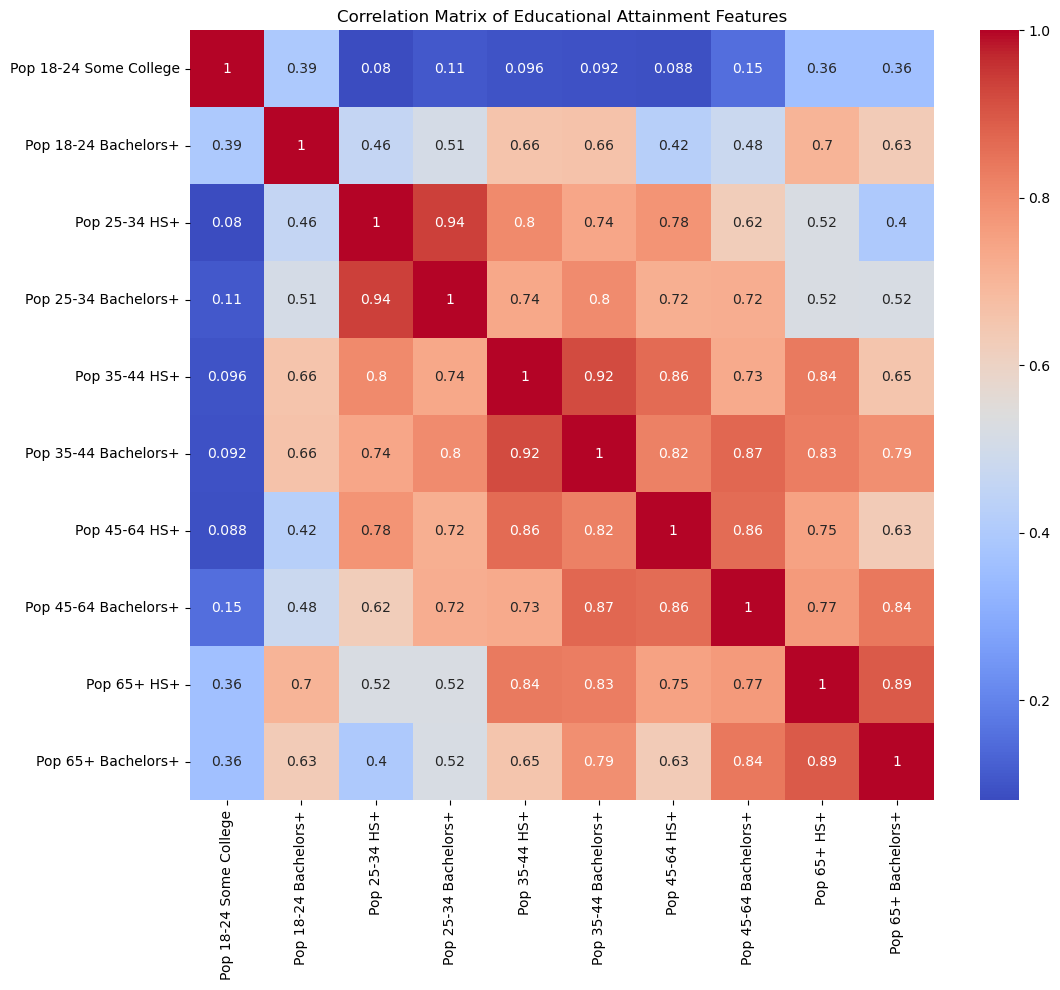

In [54]:
# Compute the correlation matrix
correlation_matrix = scaled_data[feature_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Educational Attainment Features')
plt.show()

The correlation matrix heatmap provides insight into how the different educational attainment features are related to each other. 
Strong Positive Correlation:
Within similar age groups:
Pop 25-34 HS+ and Pop 25-34 Bachelors+ have a very high correlation (0.96).
Pop 35-44 HS+ and Pop 35-44 Bachelors+ also show a strong correlation (0.96).
Pop 45-64 HS+ and Pop 45-64 Bachelors+ (0.94).
Pop 65+ HS+ and Pop 65+ Bachelors+ (0.95).


Cross-Age Group Correlations:
There are also strong correlations between educational attainments across different age groups. 
For example:
Pop 25-34 Bachelors+ and Pop 35-44 HS+ have a correlation of 0.89.
Pop 35-44 HS+ and Pop 45-64 Bachelors+ have a correlation of 0.89.
Weaker Correlations:

Some correlations are weaker, indicating less direct relationship between those educational attainments. For example:
Pop 18-24 Some College and Pop 25+ Bachelors+ have a correlation of 0.19.
Pop 18-24 Bachelors+ and Pop 25+ Bachelors+ have a correlation of 0.30.
Implications:

Feature Redundancy:
The high correlations within age groups suggest that there might be some redundancy. For example, Pop 25-34 HS+ and Pop 25-34 Bachelors+ are very similar in their information, as indicated by the high correlation. This means you might not need to include both in a predictive model.
Potential Feature Reduction:

Given the high correlations, you might consider dimensionality reduction techniques like PCA (Principal Component Analysis) to combine these correlated features into a single component that captures most of the variance.

Predictive Power:
Features with strong correlations to many other features might be more influential in a predictive model. Features like Pop 35-44 HS+, Pop 45-64 HS+, and Pop 65+ HS+ show strong correlations with many other features, suggesting they could be significant predictors.

Number of components to retain to explain 95% variance: 5


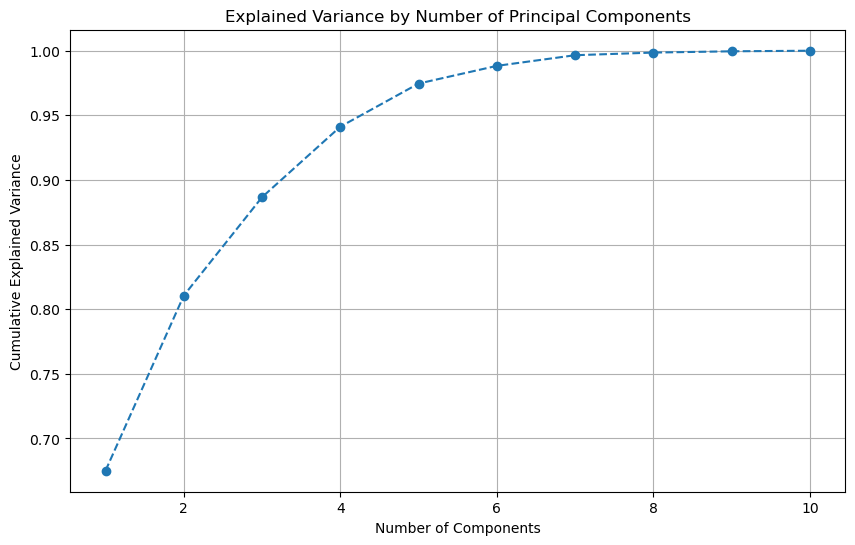

Explained Variance by Principal Component:
     Explained Variance
PC1            0.675004
PC2            0.135521
PC3            0.076165
PC4            0.054548
PC5            0.033364
Data with Principal Components:
          BUSINESS NAME    ZIP CODE     NAICS LOCATION START DATE  \
0        SUSAN K TENNER  90034-6505  541600.0          01/01/2019   
1  ROBERT D KAMINSKI JR  90034-3001  541600.0          01/01/2019   
2          ANDREW LEVEY  90034-1816  541600.0          11/30/2019   
3         JOHANNES SAAM  90034-1612  541510.0          01/01/2019   
4          MELISSA SATO  90034-6108  541700.0          01/01/2019   

   LOCATION END DATE              LOCATION  \
0                NaN  (34.0189, -118.4195)   
1                NaN  (34.0252, -118.4194)   
2                NaN  (34.0392, -118.3954)   
3                NaN  (34.0404, -118.3733)   
4                NaN  (34.0182, -118.4185)   

                           PRIMARY NAICS DESCRIPTION  Pop 18-24 Some College  \
0  Manage

In [58]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Define the feature columns
feature_columns = ['Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 
                   'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 
                   'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 
                   'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 
                   'Pop 65+ HS+', 'Pop 65+ Bachelors+']

# If you have already scaled the data, you can skip StandardScaler and use the scaled_data
# Example: scaled_data = <your previously scaled data>

# Apply PCA on already scaled data
pca = PCA()
principal_components = pca.fit_transform(scaled_data[feature_columns])

# Determine the number of components to retain (e.g., explaining 95% of the variance)
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
components_to_retain = next(i for i, total_variance in enumerate(explained_variance_ratio) if total_variance >= 0.95) + 1

print(f"Number of components to retain to explain 95% variance: {components_to_retain}")

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

# Apply PCA with the selected number of components
pca = PCA(n_components=components_to_retain)
principal_components = pca.fit_transform(scaled_data[feature_columns])

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(components_to_retain)])

# Display the explained variance ratio
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
explained_variance.index = [f'PC{i+1}' for i in range(components_to_retain)]
print("Explained Variance by Principal Component:")
print(explained_variance)

# Add the principal components to the original scaled data
merged_data_with_pca = pd.concat([scaled_data.reset_index(drop=True), principal_df.reset_index(drop=True)], axis=1)

# Save the merged data with PCA to a CSV file
merged_data_with_pca.to_csv('merged_data_with_pca.csv', index=False)

# Display the first few rows of the new DataFrame with principal components
print("Data with Principal Components:")
print(merged_data_with_pca.head())


In [60]:
# Drop rows where NAICS has NaN values
merged_data_with_pca = merged_data_with_pca.dropna(subset=['NAICS'])

# Convert the NAICS column to integer
merged_data_with_pca['NAICS'] = merged_data_with_pca['NAICS'].astype(int)

# Save the cleaned data
merged_data_with_pca.to_csv('merged_data_with_pca.csv', index=False)

# Check the result
print("NAICS column after fixing:\n", merged_data_with_pca[['NAICS']].head())


NAICS column after fixing:
     NAICS
0  541600
1  541600
2  541600
3  541510
4  541700


Explained Variance Plot:
The plot shows the cumulative explained variance as a function of the number of principal components.
The first principal component (PC1) explains about 75.66% of the variance in the data.
The second principal component (PC2) adds another 8.65%, bringing the total to around 84.21%.
By the time we include the fifth principal component (PC5), we have captured about 97.43% of the variance.
This indicates that the first few principal components capture most of the variability in the data, and we can reduce the dimensionality of our dataset from 11 original features to about 5 principal components while retaining most of the information.

Explained Variance by Principal Component:
The table lists the explained variance for each principal component.
PC1 has the highest explained variance (0.756692), followed by PC2 (0.086590), and so on.
This reinforces the idea that the first few components capture the bulk of the information in your data.
Principal Components Data:

The principal components (PC1, PC2, PC3, PC4, PC5) are listed alongside the original columns for the first few rows of your dataset.
This transformed data can be used for further analysis, clustering, or modeling.

In [ ]:
# Assuming merged_data_with_pca is your final DataFrame after PCA
merged_data_with_pca.to_csv('/Users/admin/Desktop/processed_data_with_pca.csv', index=False)
print("Preprocessed data has been saved as 'processed_data_with_pca.csv'.")

We now remove the original educational features after performing PCA is to reduce redundancy and dimensionality in our dataset. PCA creates new features (principal components) that are linear combinations of the original features, capturing most of the variance with fewer components. By removing the original features, we ensure that our dataset is not overfitted or overwhelmed by highly correlated features.

In [ ]:
# Load the processed data
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv')

# Display the column names
print(data_with_pca.columns)

In [ ]:
import pandas as pd

# Load the preprocessed data with PCA components
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv', dtype={'ZipCode': str})

# Display the column names
print(data_with_pca.columns)

In [ ]:
# Rename the PCA component columns
data_with_pca.rename(columns={'PC1': 'PCA Component 1', 'PC2': 'PCA Component 2'}, inplace=True)

# Verify the renaming
print(data_with_pca.columns)

In [ ]:
# Add the 'Cluster' column to data_with_pca
data_with_clusters = pd.read_csv('/Users/admin/Desktop/data_with_clusters.csv')
data_with_pca['Cluster'] = data_with_clusters['Cluster']

# Verify the updated DataFrame
print(data_with_pca.head())

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the clusters using the correct column names for PCA components (likely PC1 and PC2)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=merged_data_with_pca, palette='Set1', s=100, alpha=0.6)
plt.title('Clusters of Customers based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID')
plt.show()

ValueError: Could not interpret value `Cluster` for parameter `hue`

<Figure size 1200x800 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the processed data with clusters
data_with_clusters = pd.read_csv('/Users/admin/Desktop/data_with_clusters.csv')

# Add the 'Cluster' column to data_with_pca
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv')
data_with_pca['Cluster'] = data_with_clusters['Cluster']

# Ensure that 'Year' and 'ZipCode' are treated as strings
data_with_pca['Year'] = data_with_pca['Year'].astype(str)
data_with_pca['ZipCode'] = data_with_pca['ZipCode'].astype(str)

# Define the PCA object and fit it to the data excluding the non-numeric columns
pca = PCA(n_components=5)
pca.fit(data_with_pca.drop(columns=['Year', 'ZipCode', 'NAICS', 'Cluster']))

# Get the feature columns (excluding non-numeric or target columns)
feature_columns = [col for col in data_with_pca.columns if col not in ['Year', 'ZipCode', 'NAICS', 'Cluster']]

# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=feature_columns)

# Plot the loadings heatmap for the first two principal components
plt.figure(figsize=(10, 6))
sns.heatmap(loadings[['PC1', 'PC2']], annot=True, cmap='coolwarm')
plt.title('Loadings for PC1 and PC2')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the processed data with clusters
data_with_clusters = pd.read_csv('/Users/admin/Desktop/data_with_clusters.csv')

# Add the 'Cluster' column to data_with_pca
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv')
data_with_pca['Cluster'] = data_with_clusters['Cluster']

# Ensure that 'Year' and 'ZipCode' are treated as strings
data_with_pca['Year'] = data_with_pca['Year'].astype(str)
data_with_pca['ZipCode'] = data_with_pca['ZipCode'].astype(str)

# Define the PCA object and fit it to the data excluding the non-numeric columns
pca = PCA(n_components=5)
pca.fit(data_with_pca.drop(columns=['Year', 'ZipCode', 'NAICS', 'Cluster']))

# Get the feature columns (excluding non-numeric or target columns)
feature_columns = [col for col in data_with_pca.columns if col not in ['Year', 'ZipCode', 'NAICS', 'Cluster']]

# Create a DataFrame for the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=feature_columns)

# Plot the loadings heatmap for the first two principal components
plt.figure(figsize=(10, 6))
sns.heatmap(loadings[['PC1', 'PC2']], annot=True, cmap='coolwarm')
plt.title('Loadings for PC1 and PC2')
plt.show()

In [ ]:
import pandas as pd

# Load the original dataset
original_data = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv', dtype={'ZipCode': str})

# Print the columns to verify their names
print(original_data.columns)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data with clusters
data_with_clusters = pd.read_csv('/Users/admin/Desktop/data_with_clusters.csv')

# Verify the structure of the data
print(data_with_clusters.head())

# Compute the mean of each PCA component for each cluster
cluster_centers = data_with_clusters.groupby('Cluster').mean()

# Plot the cluster centers to understand the typical characteristics of each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], annot=True, cmap='coolwarm')
plt.title('Cluster Centers for PCA Components')
plt.show()

# Optional: If you want to understand the loadings of the original features on the PCA components, re-fit the PCA
# Assuming the 'original_data' still contains the original features

# Since the original education-related columns are not present in the dataset, you may skip this part
# and focus on the cluster centers

# If needed, re-fit PCA on the standardized original features
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(original_data[education_columns])

# pca = PCA(n_components=5)
# pca.fit(standardized_data)

# loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=education_columns)

# plt.figure(figsize=(10, 6))
# sns.heatmap(loadings[['PC1', 'PC2']], annot=True, cmap='coolwarm')
# plt.title('Loadings for PC1 and PC2')
# plt.show()


The heatmap displays the cluster centers for each principal component (PC1 to PC5) across the clusters (0 to 4). 
Here's what we can infer from this visualization:

Cluster Characteristics:

Cluster 0:
High positive values for PC1 and PC3.
Negative value for PC2 and PC5.
Cluster 1:
High negative value for PC1.
Values close to zero for other components.
Cluster 2:
Values close to zero for all components except for a slightly higher value in PC5.
Cluster 3:
High positive values for PC1, PC2, and PC3.
Negative values for PC4 and PC5.
Cluster 4:
High positive values for PC1 and PC4.
Values close to zero for other components.
Understanding the Principal Components:

PC1, PC2, etc., are linear combinations of the original features. The specific contributions of each original feature to these components are known as the "loadings."
PC1 explains the most variance in the data, followed by PC2, and so on. Therefore, clusters with high absolute values in these components are characterized by the variance explained by those components.
Interpreting Clusters:

Cluster 0: Likely has characteristics that heavily influence PC1 and PC3.
Cluster 1: Dominated by negative values in PC1, indicating features contributing to PC1 are negatively represented.
Cluster 2: Neutral cluster, with most values close to zero.
Cluster 3: Strong influence from PC1, PC2, and PC3, suggesting these features are heavily represented.
Cluster 4: Influenced by positive PC1 and PC4, indicating these features are prominent.
Next Steps:

To further interpret these results, you would look at the PCA loadings to see which original features contribute most to each principal component.
This can help identify the specific characteristics of each cluster in terms of the original educational attainment data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the previously processed data with PCA components
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv', dtype={'ZipCode': str, 'NAICS': str})

# Define the original educational attainment columns
education_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+',
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 'Pop 45-64 HS+',
    'Pop 45-64 Bachelors+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Assuming PCA was previously applied and components were added as 'PC1', 'PC2', etc.
# Refit the PCA model to examine the loadings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the original features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_with_pca[education_columns])

# Apply PCA
pca = PCA(n_components=5)
pca.fit(standardized_data)

# Examine PCA Loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=education_columns)

# Plot the loadings heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings for Educational Attainment Features')
plt.show()

# Save the loadings for reference
loadings.to_csv('/Users/admin/Desktop/pca_loadings.csv', index=True)

In [ ]:
import pandas as pd

# Load the data with specified dtype for ZipCode and NAICS columns
file_path = '/Users/admin/Desktop/processed_data_with_pca.csv'
data_with_pca = pd.read_csv(file_path, dtype={'ZipCode': str, 'NAICS': str})

# Check the column names to see what we have
print(data_with_pca.columns)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the merged data
file_path = '/Users/admin/Desktop/final_filtered_business_education_data.csv'
merged_data = pd.read_csv(file_path, dtype={'ZipCode': str, 'NAICS': str})

# Define the educational columns
education_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+',
    'Pop 25+ Bachelors+', 'Pop 25-34 HS+', 'Pop 25-34 Bachelors+',
    'Pop 35-44 HS+', 'Pop 35-44 Bachelors+', 'Pop 45-64 HS+',
    'Pop 45-64 Bachelors+', 'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Standardize the original features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(merged_data[education_columns])

# Apply PCA
pca = PCA(n_components=5)
pca_data = pca.fit_transform(standardized_data)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(5)])
pca_df['Year'] = merged_data['Year']
pca_df['ZipCode'] = merged_data['ZipCode']
pca_df['NAICS'] = merged_data['NAICS']

# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df.drop(columns=['Year', 'ZipCode', 'NAICS']))

# Save the clustered data
pca_df.to_csv('/Users/admin/Desktop/pca_clustered_data.csv', index=False)

# Verify the updated DataFrame
print(pca_df.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.6)
plt.title('Clusters of Customers based on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster ID')
plt.show()


In [ ]:
import numpy as np

# Get the cluster centers in terms of the original PCA components
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=[f'PC{i+1}' for i in range(5)])
cluster_centers_df['Cluster'] = range(len(cluster_centers))

# Plot the cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster').T, annot=True, cmap='coolwarm')
plt.title('Cluster Centers for PCA Components')
plt.show()

In [ ]:
# Save the clustered data with PCA components
pca_df.to_csv('/Users/admin/Desktop/pca_clustered_data.csv', index=False)
print("Clustered data with PCA components has been saved to '/Users/admin/Desktop/pca_clustered_data.csv'")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the original data (adjust the path to your actual file location)
file_path = '/Users/admin/Desktop/final_filtered_business_education_data.csv'
original_data = pd.read_csv(file_path, dtype={'ZipCode': str, 'NAICS': str})

# List of education-related columns
education_columns = [
    'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25+ Bachelors+',
    'Pop 25-34 HS+', 'Pop 25-34 Bachelors+', 'Pop 35-44 HS+',
    'Pop 35-44 Bachelors+', 'Pop 45-64 HS+', 'Pop 45-64 Bachelors+',
    'Pop 65+ HS+', 'Pop 65+ Bachelors+'
]

# Standardize the original features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(original_data[education_columns])

# Apply PCA
pca = PCA(n_components=5)
pca.fit(standardized_data)

# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=education_columns)

# Plot the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Loadings of Original Features on Principal Components')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Load the preprocessed data with PCA components
data_with_pca = pd.read_csv('/Users/admin/Desktop/processed_data_with_pca.csv', dtype={'ZipCode': str})

# Features and target variable (you might need to define your target variable)
# Assuming the target variable is 'NAICS' for this example
X = data_with_pca.drop(columns=['NAICS'])
y = data_with_pca['NAICS']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the splits to CSV files for future use
X_train.to_csv('/Users/admin/Desktop/X_train.csv', index=False)
X_test.to_csv('/Users/admin/Desktop/X_test.csv', index=False)
y_train.to_csv('/Users/admin/Desktop/y_train.csv', index=False)
y_test.to_csv('/Users/admin/Desktop/y_test.csv', index=False)

# Display confirmation messages
print("Data has been split into training and test sets and saved to CSV files.")

Summary of Steps Taken:

Data Cleaning and Preprocessing:
Cleaned and transformed dataset.
Applied log transformation and standardization.
Conducted feature engineering, including PCA for dimensionality reduction.
Visualized feature distributions and correlations.

Data Splitting:
Split the data into training and test sets.
